<a href="https://colab.research.google.com/github/DevNicque/pos-datascience/blob/modulo_3/Trabalho_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Yellow Taxi Trip Records de Abril de 2020 



---


*   Andrea Monicque |	amdss.cid20@uea.edu.br
*   Giovana de Lucca	| godl.cid20@uea.edu.br
*   Juliany Raiol	| jrr.cid20@uea.edu.br
*   Kid Mendes	| kmdon.cid20@uea.edu.br
*   Marcos Wenneton	| mwvda.cid20@uea.edu.br
*   Paula Samanta	| psds.cid20@uea.edu.br


# Configurações

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, binom_test
from scipy.stats import binom, ttest_1samp, ttest_ind, chi2_contingency
import statsmodels.stats.proportion as smp
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import t, norm
from scipy import stats
import statistics as st
import seaborn as sns
import pandas as pd
import numpy as np
from tabulate import tabulate

# Processamento de dados

In [ ]:
df = pd.read_csv('/content/drive/My Drive/datasets/yellow_tripdata_2020_04.csv')
# df = pd.read_csv('yellow_tripdata_2020_04_reduced.csv')

In [ ]:
df.head(2)

,data_hora_inicio,data_hora_fim,qtd_passageiros,distancia,tipo_pagamento,valor_gorjeta,valor_pedagio,valor_total
0,2020-04-01 00:41:22,2020-04-01 01:01:53,1,3.11,dinheiro,0.00,0.0,6.80
1,2020-04-01 00:56:00,2020-04-01 01:09:25,1,8.80,cartao_credito,2.75,0.0,16.55


In [ ]:
df.sample(5)

,data_hora_inicio,data_hora_fim,qtd_passageiros,distancia,tipo_pagamento,valor_gorjeta,valor_pedagio,valor_total
158408,2020-04-23 17:31:48,2020-04-23 17:34:03,1,1.82,cartao_credito,2.05,0.0,10.35
126844,2020-04-19 08:59:52,2020-04-19 09:08:25,1,7.48,dinheiro,0.00,0.0,13.80
77966,2020-04-11 19:53:59,2020-04-11 20:02:57,1,6.66,cartao_credito,2.66,0.0,15.96
129442,2020-04-19 18:46:41,2020-04-19 18:50:14,1,2.08,cartao_credito,1.00,0.0,9.30
42595,2020-04-06 18:16:26,2020-04-06 18:24:32,1,3.41,dinheiro,0.00,0.0,12.30


In [ ]:
df.shape

(211747, 8)

# Visão Geral dos Dados

## a) Construir tabelas e gráficos apropriados para cada variável do data frame;

Text(0.5, 1.0, 'Histograma da variável distancia')

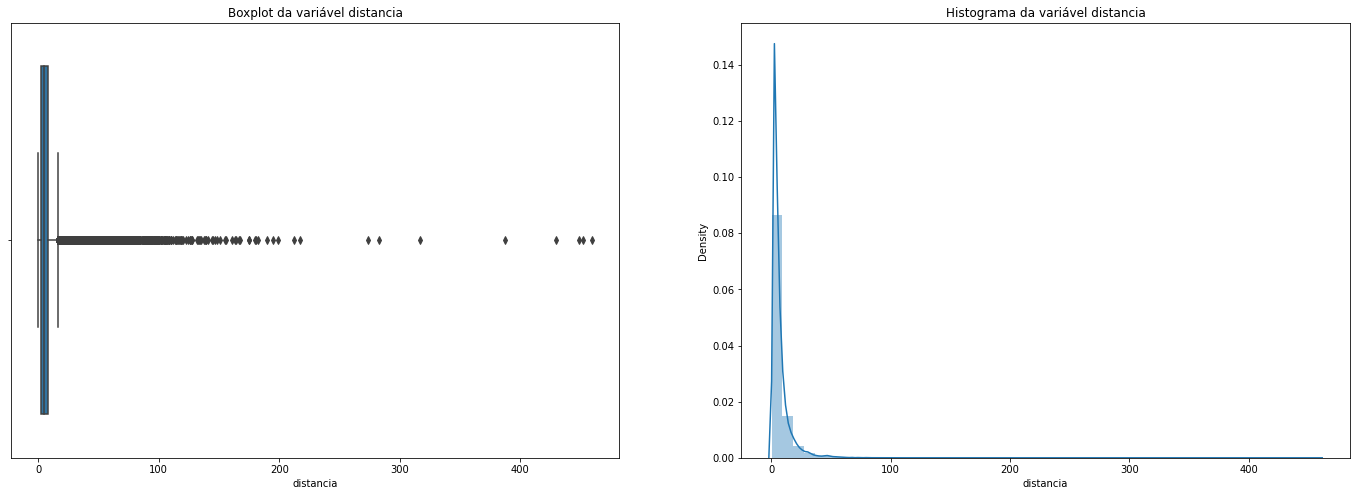

In [ ]:
coluna = 'distancia'
plt.rcParams['figure.figsize'] = 24, 8
fig, axs = plt.subplots(ncols=2)
sns.boxplot(df[coluna],  ax=axs[0]).set_title('Boxplot da variável '+ coluna)
sns.distplot(df[coluna], ax=axs[1]).set_title('Histograma da variável '+ coluna)

Text(0.5, 1.0, 'Histograma da variável valor_gorjeta')

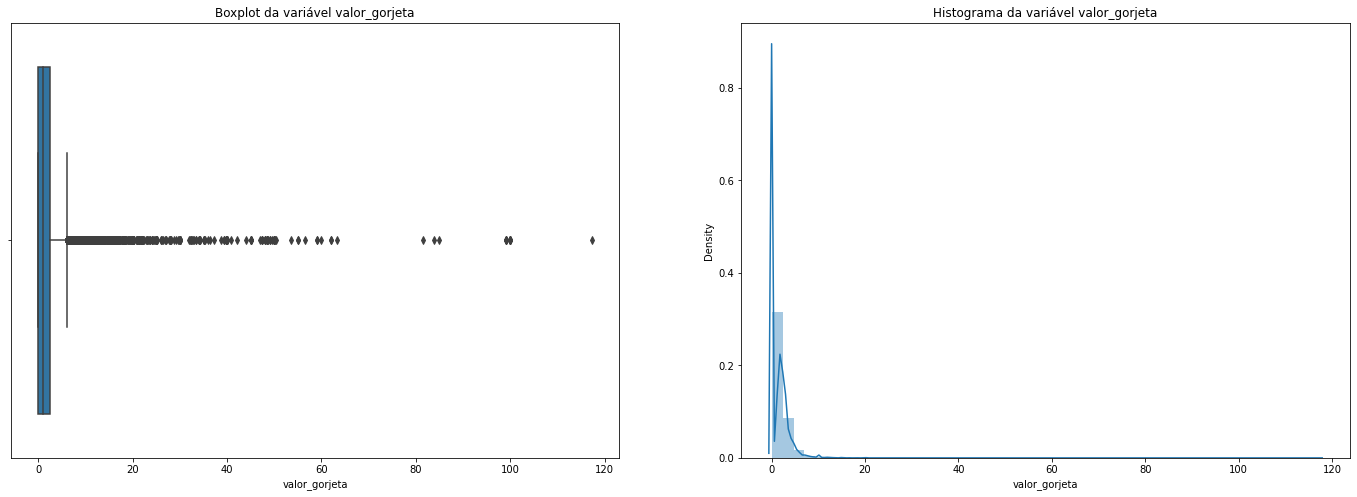

In [ ]:
coluna = 'valor_gorjeta'
plt.rcParams['figure.figsize'] = 24, 8
fig, axs = plt.subplots(ncols=2)
sns.boxplot(df[coluna],  ax=axs[0]).set_title('Boxplot da variável '+ coluna)
sns.distplot(df[coluna], ax=axs[1]).set_title('Histograma da variável '+ coluna)

Text(0.5, 1.0, 'Histograma da variável valor_pedagio')

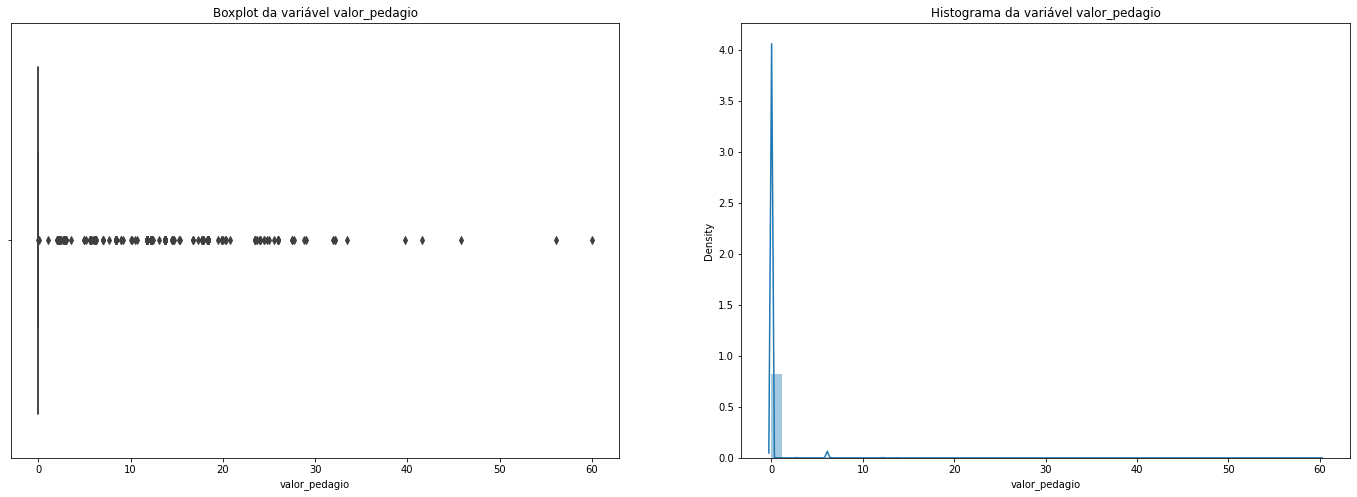

In [ ]:
coluna = 'valor_pedagio'
plt.rcParams['figure.figsize'] = 24, 8
fig, axs = plt.subplots(ncols=2)
sns.boxplot(df[coluna],  ax=axs[0]).set_title('Boxplot da variável '+ coluna)
sns.distplot(df[coluna], ax=axs[1]).set_title('Histograma da variável '+ coluna)

Text(0.5, 1.0, 'Histograma da variável valor_total')

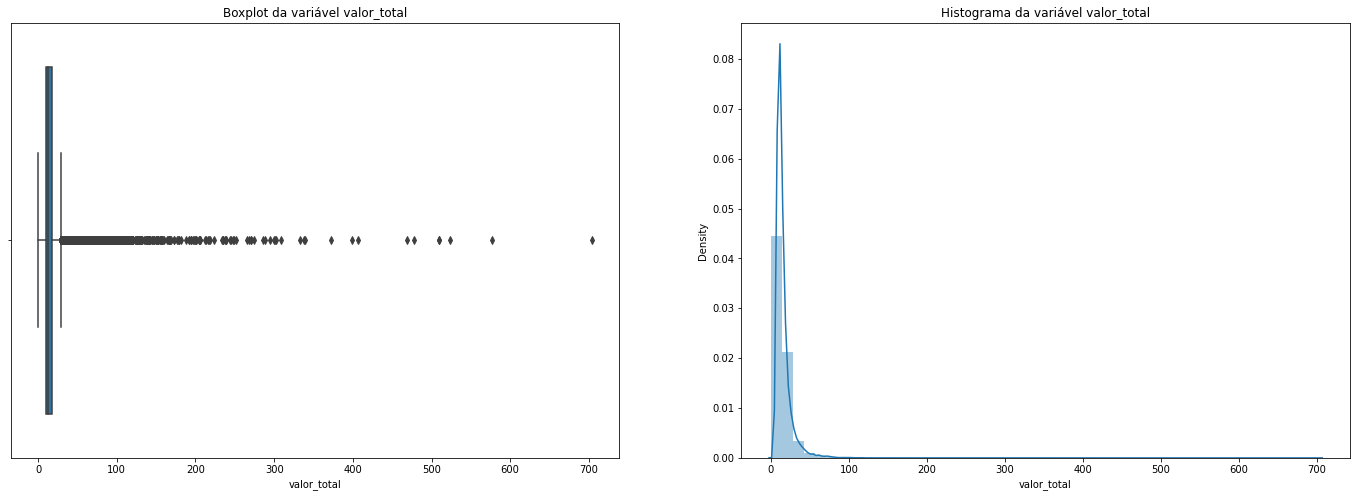

In [ ]:
coluna = 'valor_total'
plt.rcParams['figure.figsize'] = 24, 8
fig, axs = plt.subplots(ncols=2)
sns.boxplot(df[coluna],  ax=axs[0]).set_title('Boxplot da variável '+ coluna)
sns.distplot(df[coluna], ax=axs[1]).set_title('Histograma da variável '+ coluna)

Text(0.5, 1.0, 'Histograma da variável qtd_passageiros')

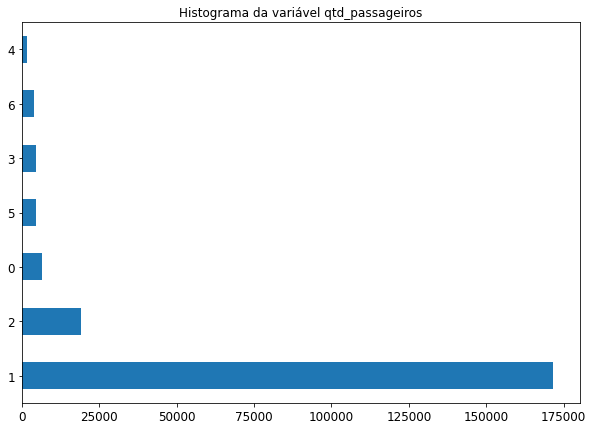

In [ ]:
coluna = 'qtd_passageiros'
df[coluna].value_counts().plot(kind = 'barh', figsize=(10,7), fontsize=12).set_title('Histograma da variável '+ coluna)

Text(0.5, 1.0, 'Histograma da variável tipo_pagamento')

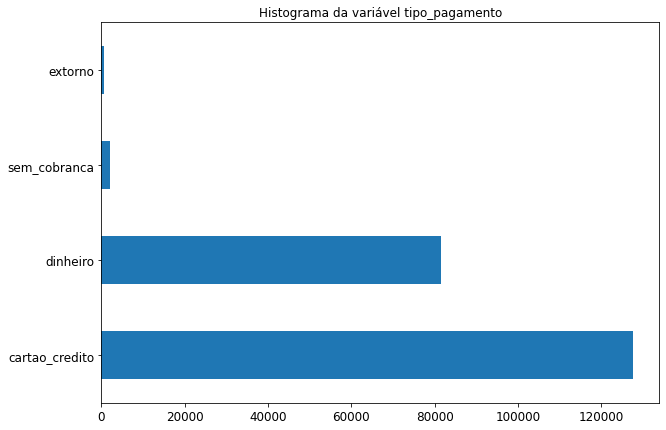

In [ ]:
coluna = 'tipo_pagamento'
df[coluna].value_counts().plot(kind = 'barh', figsize=(10,7), fontsize=12).set_title('Histograma da variável '+ coluna)

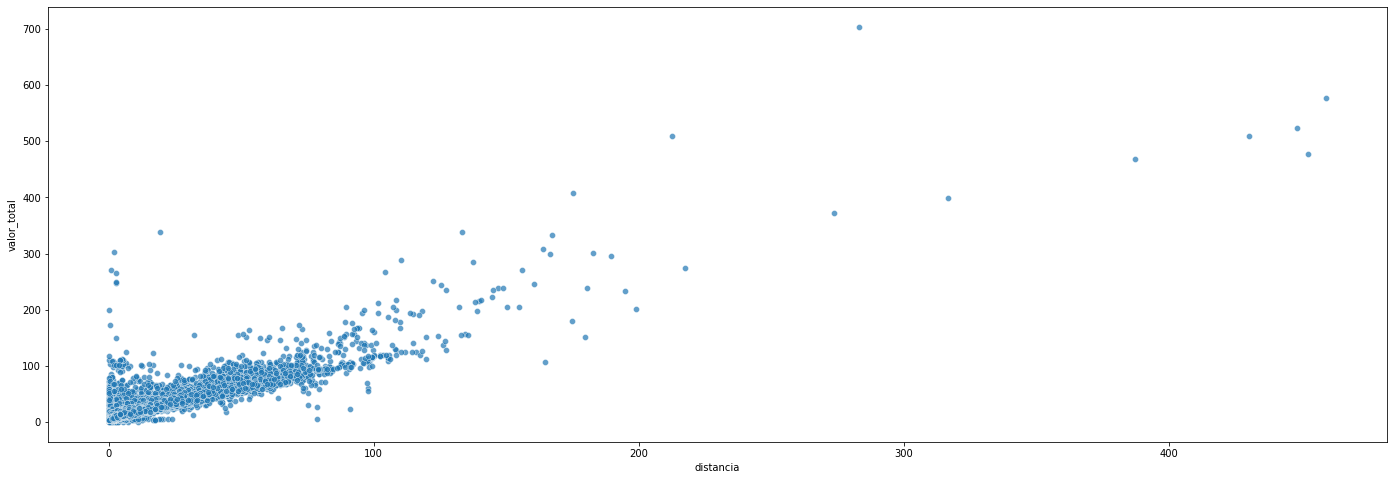

In [ ]:
sns.scatterplot(df['distancia'], df['valor_total'], alpha=.7)

## b) Calcular a média, mediana, moda, desvio-padrão, coeficiente de variação e simetria das variáveis quantitativas;

In [ ]:
def cv(n):
  return round(100*st.stdev(n)/st.mean(n), 2)

In [ ]:
def descritiva(column):
  min_value, per_25, per_50, per_75, max_value = np.quantile(df[column], [0, 0.25, 0.5, 0.75, 1])
  return (
    column,
    round(st.mean(df[column]), 2),
    round(st.median(df[column]), 2),
    round(st.mode(df[column]), 2),
    round(st.stdev(df[column]), 2),
    round(st.variance(df[column]), 2),
    round(cv(df[column]), 2),
    round(min_value, 2),
    round(per_25, 2),
    round(per_50, 2),
    round(per_75, 2),
    round(max_value, 2)
  )

In [ ]:
column_format = '{:<18s}' + '   {:>7s}'*11
row_format = '{:<18s}' + '   {:>7.2f}'*11

In [ ]:
colunas_continuas = ['distancia', 'valor_gorjeta', 'valor_pedagio', 'valor_total']
print(column_format.format('coluna', 'média', 'mediana', 'moda', 'std', 'var', 'cv', 'min', '25%', '50%', '75%', 'max'))
print('-'*(18+10*11))
for column in colunas_continuas:
  print(row_format.format(*descritiva(column)))

coluna                 média   mediana      moda       std       var        cv       min       25%       50%       75%       max
--------------------------------------------------------------------------------------------------------------------------------
distancia               6.97      4.41      2.33      8.70     75.75    124.90      0.03      2.54      4.41      8.03    459.47
valor_gorjeta           1.54      1.00      0.00      2.29      5.26    148.71      0.00      0.00      1.00      2.45    117.28
valor_pedagio           0.13      0.00      0.00      1.06      1.13    829.78      0.00      0.00      0.00      0.00     60.00
valor_total            15.40     12.36      8.80     11.42    130.40     74.17      0.30      9.80     12.36     17.29    703.70


## c) Analisar a normalidade dos dados numéricos e se existe a presença de outliers;

In [ ]:
def shapiro(column):
  prob, p = stats.shapiro(df[column])
  return (column, round(prob,2), round(p, 2))

In [ ]:
column_format = '{:<18s}' + '   {:>7s}'*2
row_format = '{:<18s}' + '   {:>7.2f}'*2

print(column_format.format('coluna', 'prob', 'p-valor'))
print('-'*(18+10*2))
for column in colunas_continuas:
  print(row_format.format(*shapiro(column)))

coluna                  prob   p-valor
--------------------------------------
distancia               0.57      0.00
valor_gorjeta           0.59      0.00
valor_pedagio           0.10      0.00
valor_total             0.59      0.00


**R**: Considerando o teste de Shapiro-Wilk, todos os p-valores são menores que alpha (para 0.05) e, portanto, rejeita-se Ho e as distribuições não são normais.

## d) Comparar as variáveis quantitativas e descrever qual é mais homogênea;

In [ ]:
column_format = '{:<18s}' + '   {:>7s}'
row_format = '{:<18s}' + '   {:>7.2f}'

quantitativas = ['qtd_passageiros', 'distancia', 'valor_gorjeta', 'valor_pedagio', 'valor_total']

print(column_format.format('coluna', 'cv'))
print('-'*(18+10))

for quantitativa in quantitativas:
  print(row_format.format(*(quantitativa, round(cv(df[quantitativa]), 2))))

coluna                    cv
----------------------------
qtd_passageiros        76.17
distancia             124.90
valor_gorjeta         148.71
valor_pedagio         829.78
valor_total            74.17


**R:** Comparando os coeficientes de variação das variáveis quantitativas, podemos concluir que os dados referentes ao *valor_total*, por ter o menor coeficiente de variação, são mais homogêneos que os demais valores quantitativos.

## e) Calcular os respectivos Intervalos de Confiança ao nível de 95% para cada campo do data frame;

In [ ]:
df.head()

,data_hora_inicio,data_hora_fim,qtd_passageiros,distancia,tipo_pagamento,valor_gorjeta,valor_pedagio,valor_total
0,2020-04-01 00:41:22,2020-04-01 01:01:53,1,3.11,dinheiro,0.00,0.0,6.80
1,2020-04-01 00:56:00,2020-04-01 01:09:25,1,8.80,cartao_credito,2.75,0.0,16.55
2,2020-04-01 00:00:26,2020-04-01 00:09:25,1,7.26,cartao_credito,1.00,0.0,14.80
3,2020-04-01 00:24:38,2020-04-01 00:34:38,0,6.73,cartao_credito,1.00,0.0,14.80
4,2020-04-01 00:13:24,2020-04-01 00:18:26,1,3.73,cartao_credito,3.00,0.0,13.30


In [ ]:
def intervalo_confianca2(df, column, nivel=0.95):
  n = len(df)
  media = st.mean(df[column])
  std = st.stdev(df[column])
  inf,sup = t.interval(nivel, n-1, loc=media, scale=std/np.sqrt(n))
  return column, inf, media, sup

In [ ]:
column_format = '{:<18s}' + '   {:>10s}'*3
row_format = '{:<18s}' + '   {:>10.2f}'*3

print(column_format.format('coluna', 'inferior', 'media', 'superior'))
print('-'*(18+13*3))
for column in colunas_continuas:
  print(row_format.format(*intervalo_confianca2(df, column)))

coluna                 inferior        media     superior
---------------------------------------------------------
distancia                  6.93         6.97         7.01
valor_gorjeta              1.53         1.54         1.55
valor_pedagio              0.12         0.13         0.13
valor_total               15.35        15.40        15.45


## f) Comparar a média de um campo numérico em relação a um campo categórico e responder se existe diferença estatística ao nível de 5% de significância;

In [ ]:
df[['tipo_pagamento', 'distancia']].groupby(['tipo_pagamento']).agg({'distancia':'mean'}).reset_index()


,tipo_pagamento,distancia
0,cartao_credito,7.146918
1,dinheiro,6.679539
2,extorno,7.734600
3,sem_cobranca,7.057730


In [ ]:
df_credito = df.loc[df.tipo_pagamento == "cartao_credito"]
df_dinheiro = df.loc[df.tipo_pagamento == "dinheiro"]
df_extorno = df.loc[df.tipo_pagamento == "extorno"]
df_sem_cobranca = df.loc[df.tipo_pagamento == "sem_cobranca"]

print("Cartão de Crédito:",df_credito.shape)
print("Dinheiro:",df_dinheiro.shape)
print("Extorno:",df_extorno.shape)
print("Sem Cobrança:",df_sem_cobranca.shape)


Cartão de Crédito: (127488, 9)
Dinheiro: (81481, 9)
Extorno: (663, 9)
Sem Cobrança: (2115, 9)


In [ ]:
alfa=0.05
#credito
média_cc = np.mean(df_credito.distancia)
dp_cc = np.std(df_credito.distancia)
print("Média cartão de crédito =",round(média_cc,2))
print("Desvio-padrão cartão de crédito =",round(dp_cc,2))
#dinheiro
média_d = np.mean(df_dinheiro.distancia)
dp_d = np.std(df_dinheiro.distancia)
print("Média dinheiro =",round(média_d,2))
print("Desvio-padrão dinheiro =",round(dp_d,2))
#extorno
média_e = np.mean(df_extorno.distancia)
dp_e = np.std(df_extorno.distancia)
print("Média extorno =",round(média_e,2))
print("Desvio-padrão extorno =",round(dp_e,2))
#sem cobrança
média_sc = np.mean(df_sem_cobranca.distancia)
dp_sc = np.std(df_sem_cobranca.distancia)
print("Média sem_cobranca =",round(média_sc,2))
print("Desvio-padrão sem_cobranca =",round(dp_sc,2))



#t,p = ttest_ind(df_credito.distancia,df_dinheiro.distancia,df_extorno.distancia,df_sem_cobranca.distancia)
t,p = ttest_ind(df_credito.distancia,df_dinheiro.distancia)
print('t= %0.3f, p= %0.3f' % (t, p))
if p > alfa:
   print ("Conclusão: aceita-se Ho, ou seja, as médias são estatisticamente iguais ao nível de significância de 5%")
else:
   print ("Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamente diferentes ao nível de significância de 5%")

Média cartão de crédito = 7.15
Desvio-padrão cartão de crédito = 8.88
Média dinheiro = 6.68
Desvio-padrão dinheiro = 8.37
Média extorno = 7.73
Desvio-padrão extorno = 9.36
Média sem_cobranca = 7.06
Desvio-padrão sem_cobranca = 10.0
t= 12.000, p= 0.000
Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamente diferentes ao nível de significância de 5%


## g) Realizar um cruzamento de dois campos categóricos e responder se existe diferença estatística ao nível de 5% de significância.

* Teste de hipótese: As variáveis são dependentes ou independentes?
* Variáveis categóricas: *tipo_pagamento* e *qtd_passageiros*
* $H_0$: O tipo de pagamento independe da quantidade de passageiros.

Obs: a função [```scipy.stats.chi2_contingency```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) testa a independência de variáveis em uma tabela de contigência utilizando a distribuição Chi-quadrado. 

In [ ]:
significancia = 0.05

def dependencia_chi2(tab_contigencia):
  qui, p, gl, esperado = stats.chi2_contingency(tab_contigencia, correction=False)
  print("Valores esperados: ")
  print(esperado)
  print('chi=%.3f, p=%.3f' % (qui, p))
  if p > significancia:
    print('Conclusão: aceita-se H0, ou seja, as variáveis são independentes')
  else:
    print('Conclusão: rejeita-se H0, ou seja, as variáveis são dependentes')

In [ ]:
# Tabela de contigência no pandas
tab_contingencia = pd.crosstab(df['tipo_pagamento'],df['qtd_passageiros']) 
tab_contingencia

qtd_passageiros,0,1,2,3,4,5,6
tipo_pagamento,,,,,,,
cartao_credito,3698,103799,11287,2667,903,2752,2382
dinheiro,2318,65662,7671,1836,665,1843,1486
extorno,34,573,51,4,1,0,0
sem_cobranca,382,1580,130,15,3,1,4


Devido a existência de campos da tabela com valor igual a 0, iremos fazer o agrupamento das classes **extorno** e **sem_cobranca**.

In [ ]:
tab_contingencia = tab_contingencia.reset_index().replace({'tipo_pagamento': {'extorno':'sem_cobranca'}}).groupby('tipo_pagamento', sort=False).sum()
tab_contingencia.rename(index={'sem_cobranca': 'extorno / sem_cobranca'}, inplace=True)

In [ ]:
tab_contingencia

qtd_passageiros,0,1,2,3,4,5,6
tipo_pagamento,,,,,,,
cartao_credito,3698,103799,11287,2667,903,2752,2382
dinheiro,2318,65662,7671,1836,665,1843,1486
extorno / sem_cobranca,416,2153,181,19,4,1,4


In [ ]:
dependencia_chi2(tab_contingencia)

Valores esperados: 
[[3.87255931e+03 1.03324843e+05 1.15231518e+04 2.72259223e+03
  9.46465055e+02 2.76714592e+03 2.33124217e+03]
 [2.47505652e+03 6.60376786e+04 7.36475539e+03 1.74008171e+03
  6.04911201e+02 1.76855717e+03 1.48995939e+03]
 [8.43841755e+01 2.25147791e+03 2.51092776e+02 5.93260637e+01
  2.06237444e+01 6.02969015e+01 5.07984340e+01]]
chi=1527.748, p=0.000
Conclusão: rejeita-se H0, ou seja, as variáveis são dependentes


* Calculando o tamanho de uma amostra com o erro igual a $3\%$:

In [ ]:
erro = 0.03
nivel = 0.95
alpha = 1-nivel
n = (t.ppf(alpha/2,len(df))**2)*(0.51*0.49)/(erro**2)
n

1066.6572600591048

In [ ]:
df_amostra = df.sample(int(n))

In [ ]:
tab_contingencia = pd.crosstab(df_amostra['tipo_pagamento'], df_amostra['qtd_passageiros'])
tab_contingencia

qtd_passageiros,0,1,2,3,4,5,6
tipo_pagamento,,,,,,,
cartao_credito,19,522,48,12,5,12,11
dinheiro,10,335,49,8,4,11,6
extorno,0,4,0,0,0,0,0
sem_cobranca,2,8,0,0,0,0,0


Nesse caso, fica difícil realizar um agrupamento das categorias devido a presença de muitos valores 0 na tabela. Portanto, decidiu-se por **retirar** os dados de corridas com tipo de pagamento **extorno** e **sem_cobrança**.

In [ ]:
tab_contingencia.drop(['sem_cobranca', 'extorno'], inplace=True)
tab_contingencia

qtd_passageiros,0,1,2,3,4,5,6
tipo_pagamento,,,,,,,
cartao_credito,19,522,48,12,5,12,11
dinheiro,10,335,49,8,4,11,6


In [ ]:
dependencia_chi2(tab_contingencia)

Valores esperados: 
[[ 17.33935361 512.40779468  57.99714829  11.9581749    5.38117871
   13.75190114  10.16444867]
 [ 11.66064639 344.59220532  39.00285171   8.0418251    3.61882129
    9.24809886   6.83555133]]
chi=5.921, p=0.432
Conclusão: aceita-se H0, ou seja, as variáveis são independentes
